In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in data here from your system - in this case some data from La Palma compiled by David Neave

In [2]:
out=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Liquid")
#input_Liqs=out['my_input']
Liquids1=out['Liqs']

out2=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Pyroxene")
#input_Cpxs=out2['my_input']
Cpxs1=out2['Cpxs']

out3=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Amphibole")
#input_Amps=out3['my_input']
Amps1=out3['Amps']
Amp_input=out3['my_input']

C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Calculate P and T using Ridolfi 2021

In [3]:
PT_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=Amps1, equationT="T_Ridolfi2012", equationP="P_Ridolfi2021")

## Now you may want to plot this within the calibration range.
- There are two ways to do this, first you can use the test=pt.return_Ridolfi21_cali_dataset() function to get the calibration dataset as a dataframe, which you can then plot using matplotlib anyway you want. 

Text(0, 0.5, 'SiO$_2$ Amp')

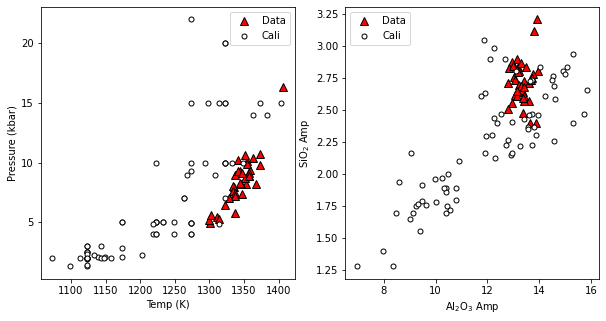

In [4]:
Ridolfi_Cali=pt.return_Ridolfi21_cali_dataset()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(PT_Ridolfi['T_K_calc'], PT_Ridolfi['P_kbar_calc'], '^k', mfc='red', ms=8, label='Data')
ax1.plot(Ridolfi_Cali['T_K'], Ridolfi_Cali['P_kbar'], 'ok', mfc='white', ms=5, label='Cali')
ax1.legend()
ax1.set_xlabel('Temp (K)')
ax1.set_ylabel('Pressure (kbar)')

ax2.plot(PT_Ridolfi['Al2O3_Amp'], PT_Ridolfi['Na2O_Amp'], '^k', mfc='red', ms=8, label='Data')
ax2.plot(Ridolfi_Cali['Al2O3_Amp'], Ridolfi_Cali['Na2O_Amp'], 'ok', mfc='white', ms=5, label='Cali')
ax2.legend()
ax2.set_xlabel('Al$_2$O$_3$ Amp')
ax2.set_ylabel('SiO$_2$ Amp')



- Alternatively, you can use this built in function to plot specific x and y values

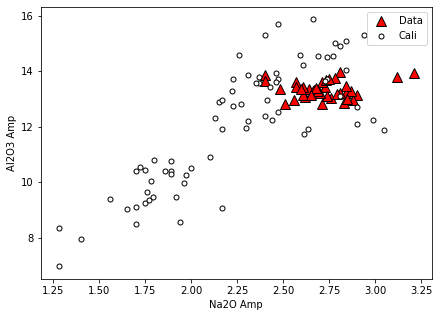

In [5]:
a=pt.Ridolfi21_cali_plot(amp_comps=Amps1,
        x='Na2O_Amp', y='Al2O3_Amp'
)

- If you want to plot P and T, you have to tell the plotting function what these are

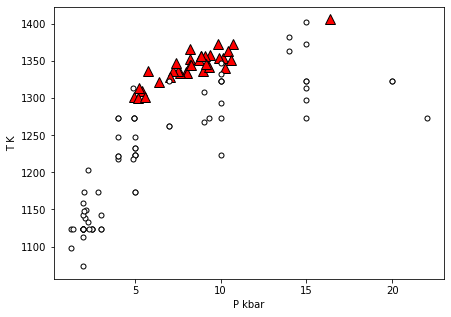

In [6]:
a=pt.Ridolfi21_cali_plot(amp_comps=Amps1, P_kbar=PT_Ridolfi['P_kbar_calc'],
        T_K=PT_Ridolfi['T_K_calc'], 
        x='P_kbar', y='T_K')

- You can also edit the marker sizes etc.

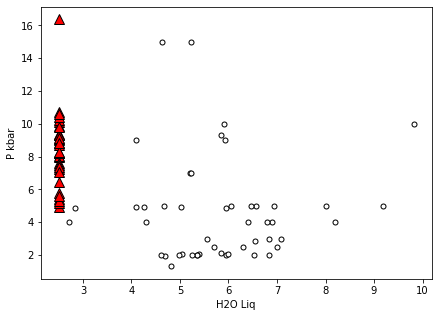

In [9]:
# First, lets add our estimated water content
Amp_input['H2O_Liq']=2.5


b=pt.Ridolfi21_cali_plot(amp_comps=Amp_input, P_kbar=PT_Ridolfi['P_kbar_calc'],
        T_K=PT_Ridolfi['T_K_calc'],  figsize=(7, 5),x='H2O_Liq', y='P_kbar',
 shape_cali='o', mfc_cali='white', mec_cali='k', ms_cali=5,
 shape_data='^', mfc_data='red', mec_data='k', ms_data=10)